In [2]:
import json

from pathlib import Path

import pandas as pd
import numpy as np

import biopsykit as bp


from biopsykit.classification.model_selection import SklearnPipelinePermuter
import pepbench.plotting
from pepbench.io import load_best_performing_algos_b_point, load_best_performing_algos_q_wave, load_preprocessed_training_data, compute_abs_error, get_best_pipeline_results, get_best_estimator, get_pipeline_steps

import pingouin as pg

import matplotlib.pyplot as plt

%matplotlib widget
%load_ext autoreload
%autoreload 2

In [3]:
model_path = Path("../../results/models")
data_path = Path("../../results/data")
result_path = Path("../../results")

In [4]:
input_data = pd.read_csv(data_path.joinpath("train_data_q_wave.csv"), index_col=[0,1,2,3,4])
input_data

rr_interval_ms_estimated  \
      participant phase         heartbeat_id_reference q_wave_onset_sample_reference                             
0     GDN0005     HoldingBreath 0                      260.0                                             850.0   
1     GDN0005     HoldingBreath 1                      260.0                                             778.0   
2     GDN0005     HoldingBreath 3                      222.0                                             746.0   
3     GDN0005     HoldingBreath 4                      220.0                                             766.0   
4     GDN0005     HoldingBreath 5                      228.0                                             790.0   
...                                                                                                        ...   
11498 VP_032      Talk          38                     153.0                                             596.0   
11499 VP_032      Talk          39                     172.0                                             619.0   
11500 VP_032      Talk          40                     181.0                                             680.0   
11501 VP_032      Talk          41                     200.0                                             719.0   
11502 VP_032      Talk          42                     212.0                                             698.0   

                                                                                      forounzafar2018  \
      participant phase         heartbeat_id_reference q_wave_onset_sample_reference                    
0     GDN0005     HoldingBreath 0                      260.0                                    276.0   
1     GDN0005     HoldingBreath 1                      260.0                                    278.0   
2     GDN0005     HoldingBreath 3                      222.0                                    236.0   
3     GDN0005     HoldingBreath 4                      220.0                                    236.0   
4     GDN0005     HoldingBreath 5                      228.0                                    242.0   
...                                                                                               ...   
11498 VP_032      Talk          38                     153.0                                    188.0   
11499 VP_032      Talk          39                     172.0                                    183.0   
11500 VP_032      Talk          40                     181.0                                    193.0   
11501 VP_032      Talk          41                     200.0                                    210.0   
11502 VP_032      Talk          42                     212.0                                    223.0   

                                                                                      martinez2004  \
      participant phase         heartbeat_id_reference q_wave_onset_sample_reference                 
0     GDN0005     HoldingBreath 0                      260.0                                 262.0   
1     GDN0005     HoldingBreath 1                      260.0                                 262.0   
2     GDN0005     HoldingBreath 3                      222.0                                 224.0   
3     GDN0005     HoldingBreath 4                      220.0                                 222.0   
4     GDN0005     HoldingBreath 5                      228.0                                 230.0   
...                                                                                            ...   
11498 VP_032      Talk          38                     153.0                                 154.0   
11499 VP_032      Talk          39                     172.0                                 173.0   
11500 VP_032      Talk          40                     181.0                                 182.0   
11501 VP_032      Talk          41                     200.0                                 201.0   
11502 VP_032 

In [6]:
permuter1 = SklearnPipelinePermuter.from_pickle(model_path.joinpath("KNeighbors_q_peak.pkl"))
permuter1.metric_summary()

true_labels  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                             
StandardScaler  SelectKBest         KNeighborsRegressor  [260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 226...   
                RFE                 KNeighborsRegressor  [260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 226...   
MinMaxScaler    SelectKBest         KNeighborsRegressor  [260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 226...   
                RFE                 KNeighborsRegressor  [260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 226...   

                                                                                         true_labels_folds  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                             
StandardScaler  SelectKBest         KNeighborsRegressor  [[260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 22...   
                RFE                 KNeighborsRegressor  [[260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 22...   
MinMaxScaler    SelectKBest         KNeighborsRegressor  [[260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 22...   
                RFE                 KNeighborsRegressor  [[260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 22...   

                                                                                          predicted_labels  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                             
StandardScaler  SelectKBest         KNeighborsRegressor  [262.1054982720167, 262.80401373977526, 223.82...   
                RFE                 KNeighborsRegressor  [262.11487266718837, 262.6920534613555, 223.80...   
MinMaxScaler    SelectKBest         KNeighborsRegressor  [262.2516395220607, 262.5756930845154, 223.663...   
                RFE                 KNeighborsRegressor  [263.11911134482887, 266.1484420778204, 223.83...   

                                                                                    predicted_labels_folds  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                             
StandardScaler  SelectKBest         KNeighborsRegressor  [[262.1054982720167, 262.80401373977526, 223.8...   
                RFE                 KNeighborsRegressor  [[262.11487266718837, 262.6920534613555, 223.8...   
MinMaxScaler    SelectKBest         KNeighborsRegressor  [[262.2516395220607, 262.5756930845154, 223.66...   
                RFE                 KNeighborsRegressor  [[263.11911134482887, 266.1484420778204, 223.8...   

                                                                                             train_indices  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                             
StandardScaler  SelectKBest         KNeighborsRegressor  [316, 317, 318, 319, 320, 321, 322, 323, 324, ...   
                RFE                 KNeighborsRegressor  [316, 317, 318, 319, 320, 321, 322, 323, 324, ...   
MinMaxScaler    SelectKBest         KNeighborsRegressor  [316, 317, 318, 319, 320, 321, 322, 323, 324, ...   
                RFE                 KNeighborsRegressor  [316, 317, 318, 319, 320, 321, 322, 323, 324, ...   

                                                                                       train_indices_folds  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                             
StandardScaler  SelectKBest         KNeighborsRegressor  [[316, 317, 318, 319, 320, 321, 322, 323, 324,...   
                RFE                 KNeighborsRegressor  [[316, 317, 318, 319, 320, 321, 322, 323, 324,...   
MinMaxScaler    SelectKBest         KNeighborsRegressor  [[316, 317, 318, 319, 320, 321, 322, 323, 324,...   
                RFE                 KNeighborsRegressor  [[316, 317, 318, 319, 320, 321, 322, 323, 324,...   

                                                                                              test_indices  \
pipeline_scaler pip

In [7]:
permuter1.best_estimator_summary()

best_estimator
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                          
StandardScaler  SelectKBest         KNeighborsRegressor  [Pipeline(memory=Memory(location=cachedir\jobl...
                RFE                 KNeighborsRegressor  [Pipeline(memory=Memory(location=cachedir\jobl...
MinMaxScaler    SelectKBest         KNeighborsRegressor  [Pipeline(memory=Memory(location=cachedir\jobl...
                RFE                 KNeighborsRegressor  [Pipeline(memory=Memory(location=cachedir\jobl...

In [8]:
permuter1.best_hyperparameter_pipeline()

C:\Users\sebas\Development\ResearchInternship\Code\BioPsyKit\src\biopsykit\classification\model_selection\sklearn_pipeline_permuter.py:680: FutureWarning: ['param_clf__weights', 'param_reduce_dim__score_func', 'params'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  .agg(["mean", "std"])


mean_test_neg_mean_absolute_error  param_clf__n_neighbors  \
outer_fold                                                              
0                                   -2.406468                      11   
1                                   -2.211107                      11   
2                                   -2.937451                      11   
3                                   -2.687628                      11   
4                                   -2.766628                      11   

            param_clf__p param_clf__weights  param_reduce_dim__k  \
outer_fold                                                         
0                      1           distance                  4.0   
1                      1           distance                  4.0   
2                      1           distance                  4.0   
3                      1           distance                  4.0   
4                      1           distance                  4.0   

                                 param_reduce_dim__score_func  \
outer_fold                                                      
0           <function mutual_info_regression at 0x00000243...   
1           <function mutual_info_regression at 0x00000243...   
2           <function mutual_info_regression at 0x00000243...   
3           <function mutual_info_regression at 0x00000243...   
4           <function mutual_info_regression at 0x00000243...   

                                                       params  \
outer_fold                                                      
0           {'clf__n_neighbors': 11, 'clf__p': 1, 'clf__we...   
1           {'clf__n_neighbors': 11, 'clf__p': 1, 'clf__we...   
2           {'clf__n_neighbors': 11, 'clf__p': 1, 'clf__we...   
3           {'clf__n_neighbors': 11, 'clf__p': 1, 'clf__we...   
4           {'clf__n_neighbors': 11, 'clf__p': 1, 'clf__we...   

            rank_test_neg_mean_absolute_error  \
outer_fold                                      
0                                           5   
1                                           1   
2                                           9   
3                                           4   
4                                           1   

            split0_test_neg_mean_absolute_error  \
outer_fold                                        
0                                     -2.275953   
1                                     -2.400573   
2                                     -3.420161   
3                                     -2.153667   
4                                     -1.240604   

            split1_test_neg_mean_absolute_error  \
outer_fold                                        
0                                     -2.023213   
1                                     -1.280076   
2                                     -2.136884   
3                                     -2.327619   
4                                     -2.988792   

            split2_test_neg_mean_absolute_error  \
outer_fold                                        
0                                     -2.625273   
1                                     -2.679754   
2                                     -2.343208   
3                                     -4.300177   
4                                     -3.515118   

            split3_test_neg_mean_absolute_error  \
outer_fold                                        
0                                     -2.918804   
1                                     -1.513481   
2                                     -2.633822   
3                                     -2.228469   
4                                     -2.165044   

            split4_test_neg_mean_absolute_error  \
outer_fold                                        
0                                     -2.189098   
1                                     -3.181650   
2                                     -4.153178   
3                                     -2.428207   
4                            

In [9]:
best_algo = get_best_pipeline_results(permuter1, metric="mean_absolute_error")
best_algo

true_labels  \
StandardScaler RFE KNeighborsRegressor  [260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 226...   

                                                                        true_labels_folds  \
StandardScaler RFE KNeighborsRegressor  [[260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 22...   

                                                                         predicted_labels  \
StandardScaler RFE KNeighborsRegressor  [262.11487266718837, 262.6920534613555, 223.80...   

                                                                   predicted_labels_folds  \
StandardScaler RFE KNeighborsRegressor  [[262.11487266718837, 262.6920534613555, 223.8...   

                                                                            train_indices  \
StandardScaler RFE KNeighborsRegressor  [316, 317, 318, 319, 320, 321, 322, 323, 324, ...   

                                                                      train_indices_folds  \
StandardScaler RFE KNeighborsRegressor  [[316, 317, 318, 319, 320, 321, 322, 323, 324,...   

                                                                             test_indices  \
StandardScaler RFE KNeighborsRegressor  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                                                       test_indices_folds  \
StandardScaler RFE KNeighborsRegressor  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...   

                                       mean_test_neg_mean_absolute_error  \
StandardScaler RFE KNeighborsRegressor                          2.539208   

                                       std_test_neg_mean_absolute_error  \
StandardScaler RFE KNeighborsRegressor                         0.620433   

                                       test_neg_mean_absolute_error_fold_0  \
StandardScaler RFE KNeighborsRegressor                            2.878641   

                                       test_neg_mean_absolute_error_fold_1  \
StandardScaler RFE KNeighborsRegressor                            3.604033   

                                       test_neg_mean_absolute_error_fold_2  \
StandardScaler RFE KNeighborsRegressor                            1.965469   

                                       test_neg_mean_absolute_error_fold_3  \
StandardScaler RFE KNeighborsRegressor                             2.15189   

                                       test_neg_mean_absolute_error_fold_4  
StandardScaler RFE KNeighborsRegressor                            2.096005

In [10]:
best_estimator, _ = get_best_estimator(permuter1, metric="mean_absolute_error")

In [11]:
best_estimator

[Pipeline(memory=Memory(location=cachedir\joblib),
         steps=[('scaler', StandardScaler()),
                ('reduce_dim',
                 RFE(estimator=SVR(kernel='linear'), n_features_to_select=0.4)),
                ('clf',
                 KNeighborsRegressor(n_neighbors=8, p=1, weights='distance'))]), Pipeline(memory=Memory(location=cachedir\joblib),
         steps=[('scaler', StandardScaler()),
                ('reduce_dim',
                 RFE(estimator=SVR(kernel='linear'), n_features_to_select=0.4)),
                ('clf',
                 KNeighborsRegressor(n_neighbors=11, p=1, weights='distance'))]), Pipeline(memory=Memory(location=cachedir\joblib),
         steps=[('scaler', StandardScaler()),
                ('reduce_dim',
                 RFE(estimator=SVR(kernel='linear'), n_features_to_select=0.4)),
                ('clf',
                 KNeighborsRegressor(n_neighbors=14, p=1, weights='distance'))]), Pipeline(memory=Memory(location=cachedir\joblib),
        

In [12]:
get_pipeline_steps(permuter1, input_data=input_data, metric="mean_absolute_error", step="reduce_dim", scaler=True)

[['forounzafar2018', 'martinez2004', 'scipy-findpeaks', 'vanlien2013-42-ms'],
 ['forounzafar2018', 'martinez2004', 'scipy-findpeaks', 'vanlien2013-42-ms'],
 ['forounzafar2018', 'martinez2004', 'scipy-findpeaks', 'vanlien2013-42-ms'],
 ['forounzafar2018', 'martinez2004', 'scipy-findpeaks', 'vanlien2013-42-ms'],
 ['forounzafar2018', 'martinez2004', 'scipy-findpeaks', 'vanlien2013-42-ms']]

In [13]:
reference_labels = best_algo["true_labels"].values[0]
reference_labels

array([260., 260., 222., ..., 207., 214., 227.])

In [14]:
best_algo["predicted_labels"].values[0]

array([262.11487267, 262.69205346, 223.80263055, ..., 200.56523147,
       213.92479789, 228.        ])

In [15]:
abs_error_estimator = np.abs(best_algo["predicted_labels"].values[0] - reference_labels)
abs_error_estimator

array([2.11487267, 2.69205346, 1.80263055, ..., 6.43476853, 0.07520211,
       1.        ])

In [16]:
np.mean(abs_error_estimator)

2.5419597120785093

### Load the computed labels of algorithms that showed good performance

In [17]:
best_algos_empkins = load_best_performing_algos_q_wave(result_path.joinpath("empkins_dataset_reference_b_point").resolve(), n_best=4)
best_algos_empkins

mean       std
q_wave_algorithm                     
vanlien2013-34-ms  5.195722  3.434739
vanlien2013-36-ms  5.432358  4.159658
martinez2004       5.439458  5.928151
scipy-findpeaks    5.439458  5.928151

In [18]:
best_algos_guardian = load_best_performing_algos_q_wave(result_path.joinpath("guardian_dataset_reference_b_point").resolve(), n_best=4)
best_algos_guardian

mean       std
q_wave_algorithm                     
martinez2004       4.326607  9.754697
scipy-findpeaks    4.326607  9.754697
vanlien2013-32-ms  4.742027  3.780616
vanlien2013-34-ms  4.855155  4.202830

In [20]:
data_best_algos_empkins = load_preprocessed_training_data(data_path.joinpath("train_data_q_wave.csv"), algorithms=best_algos_empkins.index, include_reference=True, event='q_wave')
data_best_algos_guardian = load_preprocessed_training_data(data_path.joinpath("train_data_q_wave.csv"), algorithms=best_algos_guardian.index, include_reference=True, event='q_wave')

In [21]:
abs_error_empkins = compute_abs_error(data_best_algos_empkins, data_best_algos_empkins["q_wave_onset_sample_reference"])
abs_error_empkins

vanlien2013-34-ms  \
participant phase         heartbeat_id_reference                      
GDN0005     HoldingBreath 0                                     4.0   
                          1                                     4.0   
                          3                                     6.0   
                          4                                     8.0   
                          5                                     6.0   
...                                                             ...   
VP_032      Talk          38                                   24.0   
                          39                                    3.0   
                          40                                    2.0   
                          41                                    4.0   
                          42                                    6.0   

                                                  vanlien2013-36-ms  \
participant phase         heartbeat_id_reference                      
GDN0005     HoldingBreath 0                                     2.0   
                          1                                     2.0   
                          3                                     4.0   
                          4                                     6.0   
                          5                                     4.0   
...                                                             ...   
VP_032      Talk          38                                   22.0   
                          39                                    1.0   
                          40                                    0.0   
                          41                                    2.0   
                          42                                    4.0   

                                                  martinez2004  \
participant phase         heartbeat_id_reference                 
GDN0005     HoldingBreath 0                                2.0   
                          1                                2.0   
                          3                                2.0   
                          4                                2.0   
                          5                                2.0   
...                                                        ...   
VP_032      Talk          38                               1.0   
                          39                               1.0   
                          40                               1.0   
                          41                               1.0   
                          42                               1.0   

                                                  scipy-findpeaks  
participant phase         heartbeat_id_reference                   
GDN0005     HoldingBreath 0                                   2.0  
                          1                                   2.0  
                          3                                   2.0  
                          4                                   2.0  
                          5                                   2.0  
...                                                           ...  
VP_032      Talk          38                                  1.0  
                          39                                  1.0  
                          40                                  1.0  
                          41                                  1.0  
                          42                                  1.0  

[11349 rows x 4 columns]

In [22]:
abs_error_guardian = compute_abs_error(data_best_algos_guardian, data_best_algos_guardian["q_wave_onset_sample_reference"])
abs_error_guardian

martinez2004  \
participant phase         heartbeat_id_reference                 
GDN0005     HoldingBreath 0                                2.0   
                          1                                2.0   
                          3                                2.0   
                          4                                2.0   
                          5                                2.0   
...                                                        ...   
VP_032      Talk          38                               1.0   
                          39                               1.0   
                          40                               1.0   
                          41                               1.0   
                          42                               1.0   

                                                  scipy-findpeaks  \
participant phase         heartbeat_id_reference                    
GDN0005     HoldingBreath 0                                   2.0   
                          1                                   2.0   
                          3                                   2.0   
                          4                                   2.0   
                          5                                   2.0   
...                                                           ...   
VP_032      Talk          38                                  1.0   
                          39                                  1.0   
                          40                                  1.0   
                          41                                  1.0   
                          42                                  1.0   

                                                  vanlien2013-32-ms  \
participant phase         heartbeat_id_reference                      
GDN0005     HoldingBreath 0                                     6.0   
                          1                                     6.0   
                          3                                     8.0   
                          4                                    10.0   
                          5                                     8.0   
...                                                             ...   
VP_032      Talk          38                                   26.0   
                          39                                    5.0   
                          40                                    4.0   
                          41                                    6.0   
                          42                                    8.0   

                                                  vanlien2013-34-ms  
participant phase         heartbeat_id_reference                     
GDN0005     HoldingBreath 0                                     4.0  
                          1                                     4.0  
                          3                                     6.0  
                          4                                     8.0  
                          5                                     6.0  
...                                                             ...  
VP_032      Talk          38                                   24.0  
                          39                                    3.0  
                          40                                    2.0  
                          41                                    4.0  
                          42                                    6.0  

[11349 rows x 4 columns]

### Boxplot of the absolute errors of the machine learning prediction and the best performing algorithms against the reference data

In [24]:
data = [abs_error_estimator, abs_error_empkins["martinez2004"], abs_error_empkins["scipy-findpeaks"], abs_error_guardian["vanlien2013-32-ms"], abs_error_guardian["vanlien2013-34-ms"]]
labels = ["Best Estimator", "martinez2004", "scipy-findpeaks", "vanlien2013-32-ms", "vanlien2013-34-ms"]

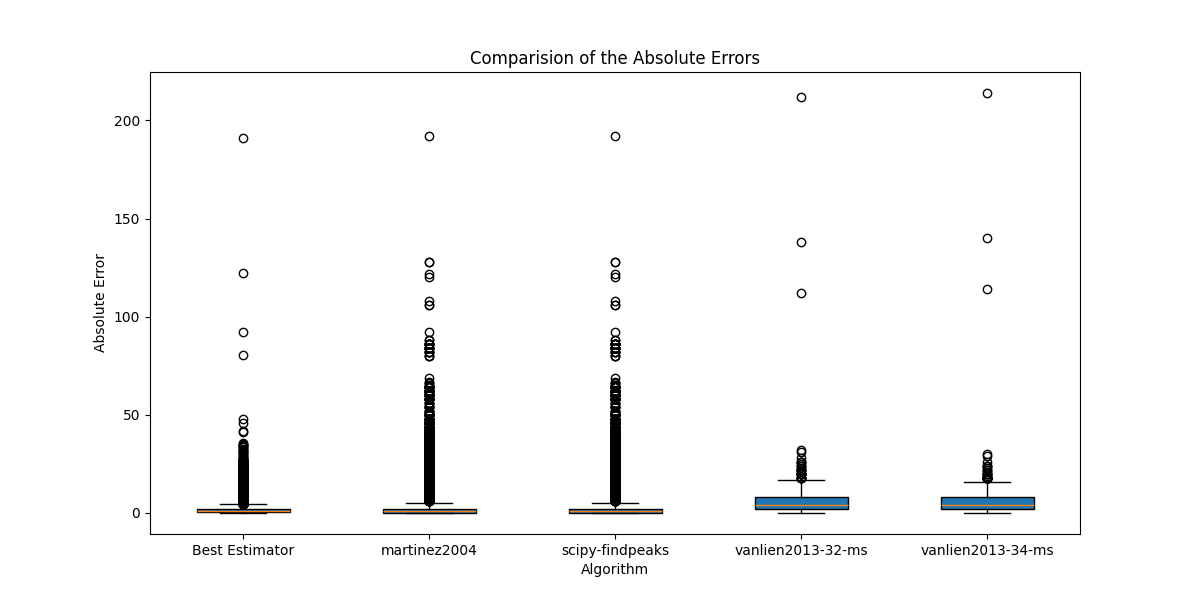

In [25]:
plt.figure(figsize=(12, 6))
plt.boxplot(data, patch_artist=True, labels=labels)
plt.title("Comparision of the Absolute Errors")
plt.xlabel("Algorithm")
plt.ylabel("Absolute Error")
plt.show()

### Residualplot of the machine learning prediction against the reference data

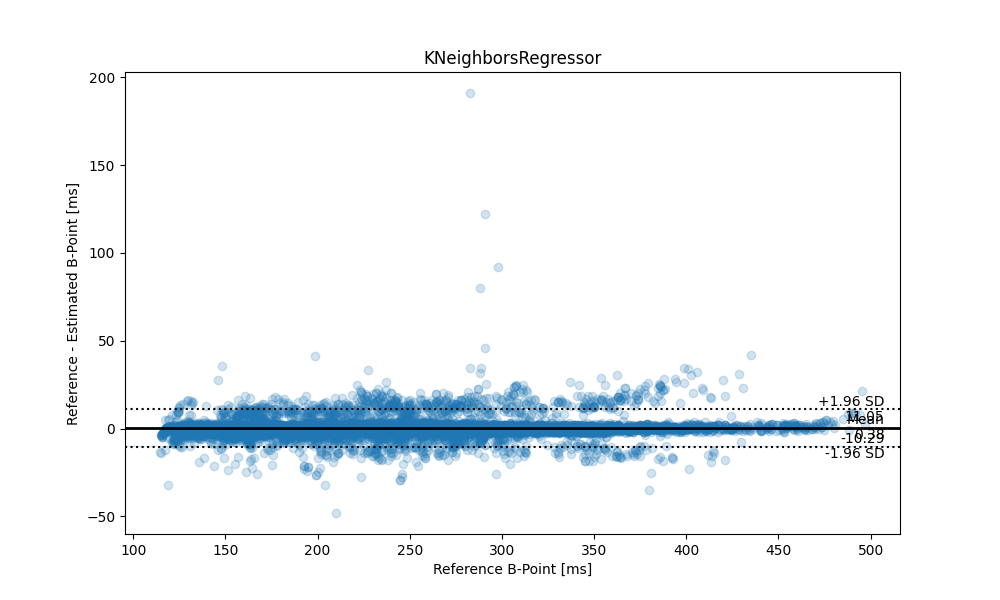

In [26]:
plt.figure(figsize=(10, 6))
pg.plot_blandaltman(best_algo["true_labels"].values[0], best_algo["predicted_labels"].values[0], alpha=0.2)
plt.title("KNeighborsRegressor")
plt.xlabel("Reference B-Point [ms]")
plt.ylabel("Reference - Estimated B-Point [ms]")
plt.show()